# Convolutional Neural Network

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy

In [12]:
# Constant Parameters
# Preprocessing Parameters
TRAIN_DIR = "../data/sample/"
MODEL_DIR = "../models/"
VALIDATION_SPLIT = 0.2
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
SEED = 1

# Training Parameters
NUM_CLASSES = 42
NUM_EPOCHS = 20
BATCH_SIZE = 64
OPTIMIZER = "adam"
LOSS_FN = "categorical_crossentropy"
METRICS = ["accuracy"]

In [ ]:
# Model Architecture
def get_model(image_depth):
    return Sequential([
        Conv2D(32, 3, input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, image_depth)),
        MaxPool2D(pool_size = (2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(1024, activation = "relu"),
        Dense(NUM_CLASSES, activation = "softmax")
    ])

## Preprocessing - Grayscale + Augment

Augmentation:
- 45 deg rotation rage
- random horizontal and vertical flip
- 40% zoom range

In [13]:
model_id = "cnn_grayscale_augment"              # Unique Identifier used for saving model
color_mode = "grayscale"                        # "rgb", "rgba" or "grayscale"
image_depth = 1                                 # Depth = Num of channels in image. Grayscale = 1, RGB = 3

In [14]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = VALIDATION_SPLIT,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.4
)

In [15]:
train_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    shuffle = True,
    seed = SEED,
    class_mode = "categorical",
    subset = "training"
)

Found 13440 images belonging to 42 classes.


In [16]:
validation_data_gen = image_generator.flow_from_directory(
    color_mode = color_mode,
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = (IMAGE_HEIGHT, IMAGE_WIDTH),
    class_mode = "categorical",
    subset = "validation"
)

Found 3360 images belonging to 42 classes.


In [17]:
model = get_model(image_depth)

In [18]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = METRICS
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              130057216 
_________________________________________________________________
dense_3 (Dense)              (None, 42)                43050     
Total params: 130,100,586
Trainable params: 130,100,586
Non-trainable params: 0
________________________________________

In [20]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = train_data_gen.n // BATCH_SIZE,
    epochs = NUM_EPOCHS,
    validation_data = validation_data_gen
)

Epoch 1/20
210/210 [==============================] - 131s 625ms/step - loss: 6.1254 - accuracy: 0.0343 - val_loss: 3.7080 - val_accuracy: 0.0387
Epoch 2/20
210/210 [==============================] - 119s 568ms/step - loss: 3.6830 - accuracy: 0.0388 - val_loss: 3.6722 - val_accuracy: 0.0467
Epoch 3/20
210/210 [==============================] - 119s 568ms/step - loss: 3.6627 - accuracy: 0.0459 - val_loss: 3.6567 - val_accuracy: 0.0524
Epoch 4/20
210/210 [==============================] - 119s 568ms/step - loss: 3.6515 - accuracy: 0.0499 - val_loss: 3.6488 - val_accuracy: 0.0509
Epoch 5/20
210/210 [==============================] - 119s 567ms/step - loss: 3.6286 - accuracy: 0.0557 - val_loss: 3.6200 - val_accuracy: 0.0577
Epoch 6/20
210/210 [==============================] - 119s 569ms/step - loss: 3.6087 - accuracy: 0.0647 - val_loss: 3.6133 - val_accuracy: 0.0604
Epoch 7/20
210/210 [==============================] - 119s 568ms/step - loss: 3.6011 - accuracy: 0.0627 - val_loss: 3.5988 -

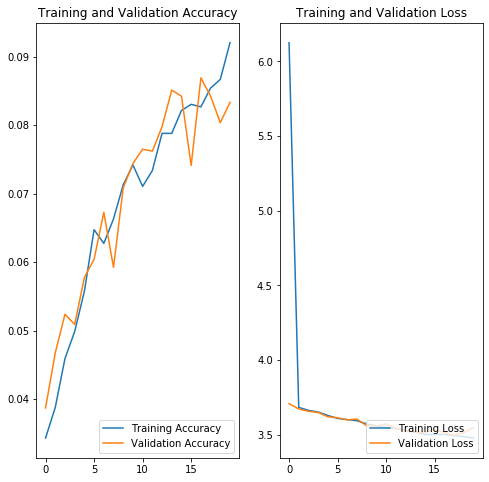

In [21]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [23]:
model.save(MODEL_DIR + "{}.h5".format(model_id))